In [6]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

T = 2.0            # final time
num_steps = 10     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
nx = ny = 30
mesh = RectangleMesh(Point(-2, -2), Point(2, 2), nx, ny)
V = FunctionSpace(mesh, 'P', 1)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Define initial value
u_0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))', degree=2, a=5)
u_n = interpolate(u_0, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

vtkfile = File('solutions/heat_gaussian.pvd')

<IPython.core.display.Javascript object>


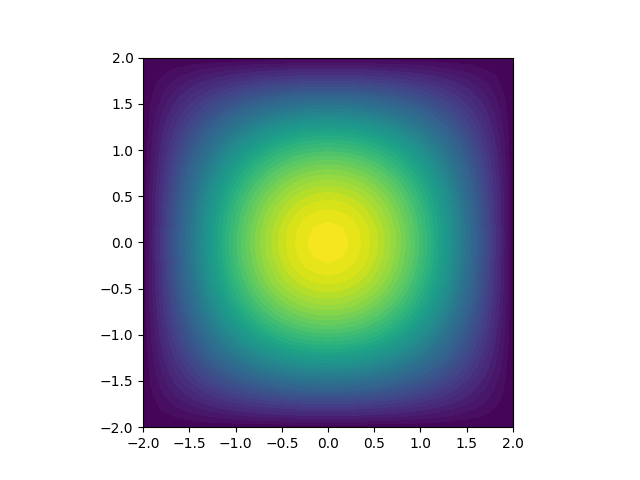

In [7]:
# Time stepping
u = Function(V)
t = 0
for n in range(num_steps):
    
    # Update current time
    t += dt
    
    # Compute solution
    solve(a == L, u, bc)
    
    # Plot solution
    vtkfile << (u, t)
    plot(u)
    
    # Update previous solution
    u_n.assign(u)
plt.show()